<h1><center>Final Case Study: Predicting Anonymized Data with Machine Learning</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>December 6th, 2019</center></h3>

## 1 Introduction

The goal of this project is to help our business partner predict a response variable that he has indicated. In the dataset provided, there is no explanation of what the explanatory variables represent, where the data comes from, or what influences the response variable in a business sense. The data is completely anonymized. Still, the partner expects a machine learning algorithm as a deliverable to predict the values of the target variable. 

This may seem unreasonable, but in fact, this is a common applied business analytics problem. Many companies hire contractors or even post their projects on open source project competitions like Kaggle. These companies cannot disclose propriotary information, so they instead use anonymization techniques to hide the actual information within the data tables. It is up to the data scientist to use applied machine learning to fit a model without any business understanding of the data or prior knowledge or intuition about what outcomes they expect from the target variable. 

## 2 Methods

### 2.1 Exploratory Data Analysis

First, we needed to find as much information about the data as possible without an actual description. Using the info() function we see that this dataframe has 51 columns. All the columns are labeled x0 to x49 except the last column that is just called y. We know from the business partner that y is the variable we would like to predict. Using the describe() function we can get the distributions of the continuous variables in the dataframe. Most of the variables were continuous but there were several columns with missing values or categorical data. However, we found using the duplicated() function that there were no duplicate rows. 

Next, we want to start looking at the relationships between the variables. In order to do this we began by creating a color coded correlation plot. In this plot, the squares ar dark blue if there is no correlation and dark red if they are perfectly correlated. As expected, the same variables are perfectly correlated with each other so the diagonal line is dark red, but we found from the plot that the variables x2 and x6 are perfectly correlated as well as x38 and x41. This could mean that perhaps the variables represent the same information and having both in a model would be unhelpful. 

Next, we need to explore the categorical variables that were found in the data. We found that the columns x24, x29, and x30 were all true categorical variables. However, columns 32 and 37 were numerical values that needed to be converted and added back into the data frame. So, we converted those. 

We found that about 1% of the data rows had columns with NA values, so we dropped them. 

Finally, we inspected our response variable, y. The y column is binary. After comparing the proportion of both outcomes possible in the column, we see that the target variable is not highly imbalanced. The percentage of 'no' is 60 % and the percentage of yes is 40%.

### 2.2 Data Preparation

Next we need to prepare the data in order to apply machine learning algorithms to it. The first step is to use one hot encoding to transofrm the categorical variables so that they can be modelled with dummy variables. 

In addition to the cross validation within the modeling analysis, we wanted to set aside an "outer fold" of validation data. This would be a 20% random sampling of the entire data set.

### 2.3 Logistic Regression

The first model we explored was Logistic Regression. We decided to start with this model because we know that the response variable is binary, but unlike other machine learning algorithms, the inputs are easily understandable and explainable to a non-technical audience. 

For our logistic regression model, we used a Lasso penalty.

### 2.4 Random Forest Classification

Since logistic regression didn't provide high enough accuracy, we decided to try a random forest classifier next. 

## 3 Results


## 4 Conclusions


## References


## Code

In [1]:
import os, fnmatch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
import itertools


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
#data_df = pd.read_csv('final_project.csv')  
data_df=pd.read_csv('~/Downloads/final_project.csv')
data_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [7]:
data_df[['x0','x1','x2','x3','x4','x5','x6','x7','x8']].describe(include='all',)

,x0,x1,x2,x3,x4,x5,x6,x7,x8
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831


In [8]:
data_df[['x9','x10','x11','x12','x13','x14','x15','x16','x17']].describe(include='all',)


,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000
mean,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040
std,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351
min,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898
25%,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470
50%,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541
75%,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962
max,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048


In [9]:
data_df[['x18','x19','x20','x21','x22','x23','x24','x25','x26','x27']].describe(include='all',)


,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
count,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159972,159978.000000,159964.000000,159970.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,138965,NaN,NaN,NaN
mean,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,NaN,-0.000806,-0.001066,-0.004159
std,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,NaN,1.263656,0.843258,6.774047
min,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,NaN,-6.364653,-3.857484,-32.003555
25%,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,NaN,-0.852784,-0.567293,-4.597919
50%,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,NaN,-0.003723,-0.001501,0.037138
75%,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,NaN,0.851765,0.567406,4.649773


In [10]:
data_df[['x18','x19','x20','x21','x22','x23','x24','x25','x26','x27']].describe(include='all',)


,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
count,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159972,159978.000000,159964.000000,159970.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,138965,NaN,NaN,NaN
mean,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,NaN,-0.000806,-0.001066,-0.004159
std,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,NaN,1.263656,0.843258,6.774047
min,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,NaN,-6.364653,-3.857484,-32.003555
25%,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,NaN,-0.852784,-0.567293,-4.597919
50%,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,NaN,-0.003723,-0.001501,0.037138
75%,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,NaN,0.851765,0.567406,4.649773


In [12]:
data_df[['x28','x29','x30','x31','x32','x33','x34','x35','x36','x37']].describe(include='all',)


,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37
count,159965.000000,159970,159970,159961.000000,159969,159959.000000,159959.000000,159970.000000,159973.000000,159977
unique,NaN,12,5,NaN,12,NaN,NaN,NaN,NaN,129198
top,NaN,July,wednesday,NaN,0.01%,NaN,NaN,NaN,NaN,$-311.26
freq,NaN,45569,101535,NaN,40767,NaN,NaN,NaN,NaN,6
mean,0.031543,NaN,NaN,-0.005945,NaN,-0.006567,-0.000426,0.000936,0.006453,NaN
std,14.439534,NaN,NaN,2.767508,NaN,1.747762,8.014180,2.379558,1.593183,NaN
min,-72.896705,NaN,NaN,-12.289364,NaN,-7.451454,-36.116606,-10.008149,-6.866024,NaN
25%,-9.702464,NaN,NaN,-1.874206,NaN,-1.183681,-5.401084,-1.610337,-1.068337,NaN
50%,0.244210,NaN,NaN,0.002013,NaN,-0.006079,-0.013089,-0.002399,0.003645,NaN
75%,9.936995,NaN,NaN,1.856369,NaN,1.179460,5.411667,1.603089,1.079895,NaN


In [13]:
data_df[['x38','x39','x40','x41','x42','x43','x44','x45','x46','x47']].describe(include='all',)


,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47
count,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000
mean,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622
std,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157
min,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333
25%,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016
50%,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865
75%,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028
max,90.467981,21.545591,88.824477,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854


In [14]:
data_df[['x48','x49','y']].describe(include='all',)


,x48,x49,y
count,159968.000000,159968.000000,160000.000000
mean,-0.000224,-0.674224,0.401231
std,1.935501,15.036738,0.490149
min,-8.490155,-65.791191,0.000000
25%,-1.320800,-10.931753,0.000000
50%,-0.011993,-0.574410,0.000000
75%,1.317703,9.651072,1.000000
max,8.226552,66.877604,1.000000


In [11]:
data_df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [15]:
# To find duplicated rows in data Frame
data_df.duplicated().any()

False

In [5]:
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [16]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in data_df.columns:
    if data_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif data_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

In [17]:
categoricalVars


['x24', 'x29', 'x30', 'x32', 'x37']

In [18]:
data_df['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

In [19]:
data_df['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [20]:
data_df['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

In [21]:
data_df['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [22]:
data_df['x37'].unique()


array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [23]:
data_wrk_df = data_df.copy()

data_wrk_df['x32_new']=data_wrk_df['x32'].replace(r'%','', regex=True)
data_wrk_df['x37_new']=data_wrk_df['x37'].replace(r'\$','', regex=True)

data_wrk_df.drop(['x32','x37'],axis=1,inplace=True)

In [24]:
data_wrk_df['x32_new'].head()


0      0.0
1    -0.02
2    -0.01
3     0.01
4     0.01
Name: x32_new, dtype: object

In [25]:
data_wrk_df['x37_new'].head()


0     1313.96
1     1962.78
2      430.47
3    -2366.29
4     -620.66
Name: x37_new, dtype: object

In [26]:
data_wrk_df['x37_new']=data_wrk_df['x37_new'].astype(float)
data_wrk_df['x32_new']=data_wrk_df['x32_new'].astype(float)

In [27]:
data_wrk_dropna_df=data_wrk_df.copy()
data_wrk_dropna_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)

In [28]:
print('number of rows in original datframe')
print(data_wrk_df['y'].count())

print('number of rows after removing rows with any columns having na')
print(data_wrk_dropna_df['y'].count())

number of rows in original datframe
160000
number of rows after removing rows with any columns having na
158392


In [29]:
(160000-158392)/160000


0.01005

In [30]:
data_wrk_dropna_df['x32_new'].head()


0    0.00
1   -0.02
2   -0.01
3    0.01
4    0.01
Name: x32_new, dtype: float64

In [31]:
data_wrk_dropna_df.describe()


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x49,y,x32_new,x37_new
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195,-0.000010,0.502723
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142,0.010397,999.670281
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000,-0.050000,-4734.540000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000,-0.010000,-690.690000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000,-0.000000,-13.320000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000,0.010000,664.050000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000,0.050000,5546.990000


In [32]:
count_no_sub = len(data_wrk_dropna_df[data_wrk_dropna_df['y']==0])
count_sub = len(data_wrk_dropna_df[data_wrk_dropna_df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no  is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of yes", pct_of_sub*100)

percentage of no  is 59.88054952270316
percentage of yes 40.11945047729683


## Prepare Data for Modeling

In [33]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars_wrk = list()
# List to hold names of numerical variables
numericalVars_wrk = list()

for colName in data_wrk_dropna_df.columns:
    if data_wrk_df[colName].dtype == np.int64:
        numericalVars_wrk.append(colName)
    elif data_wrk_df[colName].dtype == np.object:
        categoricalVars_wrk.append(colName)
    else:
        pass

In [34]:
categoricalVars_wrk

['x24', 'x29', 'x30']

In [35]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars_wrk:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(data_wrk_dropna_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    data_wrk_dropna_df = pd.concat((data_wrk_dropna_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
data_wrk_dropna_df.drop(categoricalVars_wrk, inplace=True, axis=1)
data_wrk_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 65 columns):
x0               158392 non-null float64
x1               158392 non-null float64
x2               158392 non-null float64
x3               158392 non-null float64
x4               158392 non-null float64
x5               158392 non-null float64
x6               158392 non-null float64
x7               158392 non-null float64
x8               158392 non-null float64
x9               158392 non-null float64
x10              158392 non-null float64
x11              158392 non-null float64
x12              158392 non-null float64
x13              158392 non-null float64
x14              158392 non-null float64
x15              158392 non-null float64
x16              158392 non-null float64
x17              158392 non-null float64
x18              158392 non-null float64
x19              158392 non-null float64
x20              158392 non-null float64
x21              158392 non-

In [37]:
validation = data_wrk_dropna_df.sample(frac=.2, replace=False, weights=None, random_state=999, axis=0)
validation.shape

(31678, 65)

In [38]:
count_no_sub_val = len(validation[validation['y']==0])
count_sub_val = len(validation[validation['y']==1])
pct_of_no_sub_val = count_no_sub_val/(count_no_sub_val+count_sub_val)
print("percentage of no  is", pct_of_no_sub_val*100)
pct_of_sub_val = count_sub_val/(count_no_sub_val+count_sub_val)
print("percentage of yes", pct_of_sub_val*100)

percentage of no  is 59.918555464360125
percentage of yes 40.081444535639875


In [39]:
data_wrk_dropna_df.drop(axis = 0, index = list(validation.index.values), inplace = True)
data_wrk_dropna_df.shape

(126714, 65)

In [40]:
count_no_sub = len(data_wrk_dropna_df[data_wrk_dropna_df['y']==0])
count_sub = len(data_wrk_dropna_df[data_wrk_dropna_df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no  is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of yes", pct_of_sub*100)

percentage of no  is 59.871048187256335
percentage of yes 40.12895181274366


In [41]:
X_wrk = data_wrk_dropna_df.copy()

X_wrk.drop('y',axis=1 , inplace=True)
y_wrk=data_wrk_dropna_df['y']
print(X_wrk.shape)
print(y_wrk.shape)

(126714, 64)
(126714,)


In [ ]:
## feature elimination

In [42]:
print("X_fs info")
print("==========")
X_wrk.info()

print("y_fs info")
print("==========")
type(y_wrk)

X_fs info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 126714 entries, 0 to 159999
Data columns (total 64 columns):
x0               126714 non-null float64
x1               126714 non-null float64
x2               126714 non-null float64
x3               126714 non-null float64
x4               126714 non-null float64
x5               126714 non-null float64
x6               126714 non-null float64
x7               126714 non-null float64
x8               126714 non-null float64
x9               126714 non-null float64
x10              126714 non-null float64
x11              126714 non-null float64
x12              126714 non-null float64
x13              126714 non-null float64
x14              126714 non-null float64
x15              126714 non-null float64
x16              126714 non-null float64
x17              126714 non-null float64
x18              126714 non-null float64
x19              126714 non-null float64
x20              126714 non-null float64
x21              1

pandas.core.series.Series

### Logistic Regression Fitting Estimator ( Using lasso penalty )

x23 has weight of -0.4660976224710641
x45 has weight of -0.2986769092034509
x20 has weight of -0.239309085875115
x39 has weight of -0.2332167761871846
x2 has weight of -0.17152495383333272
x6 has weight of -0.10099538532283839
x12 has weight of -0.09546670501907219
x48 has weight of -0.06239549383992876
x47 has weight of -0.03294448829077091
x8 has weight of -0.015369718510551482
x28 has weight of -0.00912453306243384
x10 has weight of -0.006966549111146484
x14 has weight of -0.0065784119962329305
x25 has weight of -0.006309887869914876
x13 has weight of -0.004804437262648969
x32_new has weight of -0.0042896971930268535
x5 has weight of -0.0035516245564316145
x17 has weight of -0.0030577064266539915
x42 has weight of -0.002711781328053607
x41 has weight of -0.002598252389981071
x35 has weight of -0.0011034929716371182
x31 has weight of -6.149244017777329e-05
x26 has weight of 0.0
x43 has weight of 0.0
x9 has weight of 0.0
x0 has weight of 0.001142903466651057
x11 has weight of 0.001700

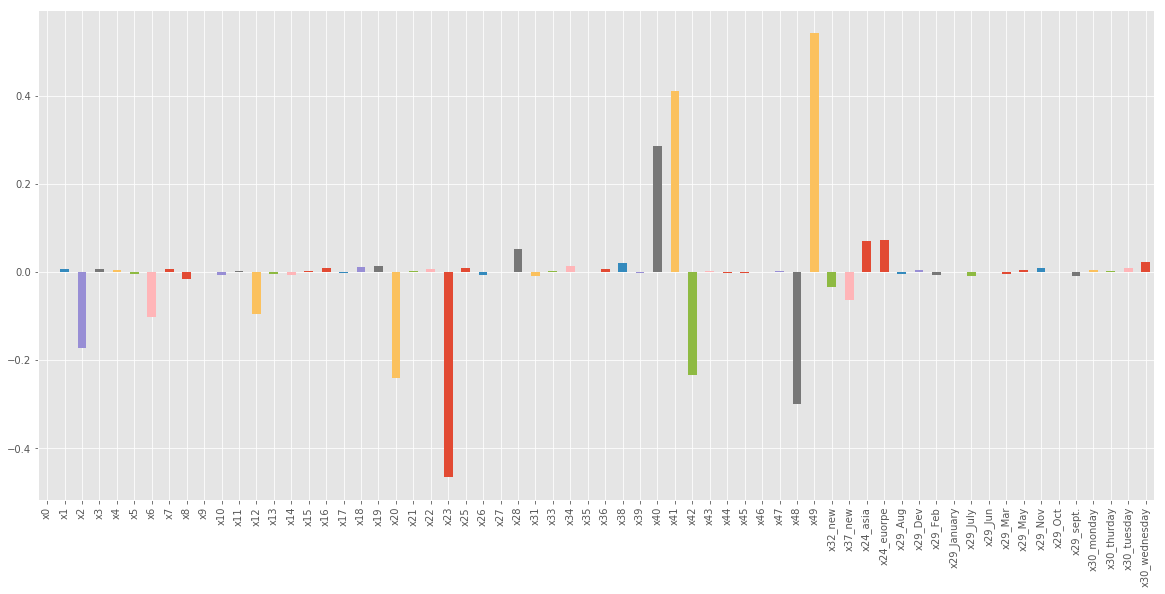

In [43]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_wrk = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_wrk.fit(X_wrk,y_wrk) 

classifier_model = logisticModel_wrk.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, data_wrk_df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=X_wrk.columns)
weights.plot(kind='bar')
plt.show()

In [44]:
X_lr = data_wrk_dropna_df.copy()
X_lr.drop('y',axis=1 , inplace=True)
y_lr=data_wrk_dropna_df['y'].values

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn import metrics
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_lr = logreg.predict(X_test_lr)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_lr ,y_test_lr)))


Accuracy of logistic regression classifier on test set: 0.71


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_lr, y_pred_lr)
print(confusion_matrix)

[[18952  3884]
 [ 7261  7918]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lr, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     22836
           1       0.67      0.52      0.59     15179

    accuracy                           0.71     38015
   macro avg       0.70      0.68      0.68     38015
weighted avg       0.70      0.71      0.70     38015



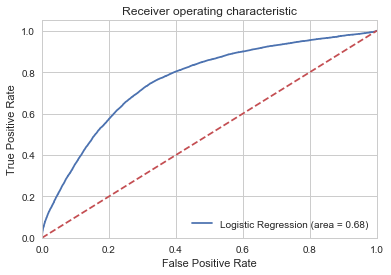

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_lr, logreg.predict(X_test_lr))
fpr, tpr, thresholds = roc_curve(y_test_lr, logreg.predict_proba(X_test_lr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train_lr)
X_train_lr = scaler.transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train_lr)
y_pred_lr = logreg.predict(X_test_lr)
print('Accuracy of logistic regression classifier on normalized test set: {:.2f}'.format(logreg.score(X_test_lr ,y_test_lr)))

Accuracy of logistic regression classifier on normalized test set: 0.71


In [52]:
y_pred_lr


array([0, 0, 1, ..., 1, 1, 1])

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
print(confusion_matrix_lr)
print(classification_report(y_test_lr, y_pred_lr))

[[18958  3878]
 [ 7265  7914]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     22836
           1       0.67      0.52      0.59     15179

    accuracy                           0.71     38015
   macro avg       0.70      0.68      0.68     38015
weighted avg       0.70      0.71      0.70     38015



In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn import metrics
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
logreg = LogisticRegression(penalty='l1', dual=False, 
                           C=1, fit_intercept=True, intercept_scaling=1.0, 
                           class_weight='balanced', random_state=None)
logreg.fit(X_train_lr, y_train_lr)
y_pred_lr = logreg.predict(X_test_lr)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_lr ,y_test_lr)))
confusion_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
print(confusion_matrix_lr)
print(classification_report(y_test_lr, y_pred_lr))

Accuracy of logistic regression classifier on test set: 0.71
[[16619  6217]
 [ 4760 10419]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75     22836
           1       0.63      0.69      0.65     15179

    accuracy                           0.71     38015
   macro avg       0.70      0.71      0.70     38015
weighted avg       0.72      0.71      0.71     38015



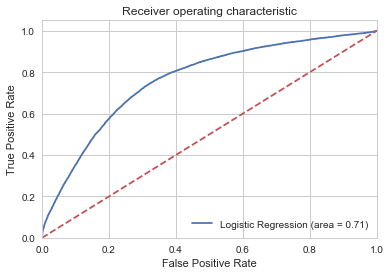

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_lr, logreg.predict(X_test_lr))
fpr, tpr, thresholds = roc_curve(y_test_lr, logreg.predict_proba(X_test_lr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest Classifier

In [56]:
X_rf = data_wrk_dropna_df.copy()
X_rf.drop('y',axis=1 , inplace=True)
y_rf=data_wrk_dropna_df['y'].values

In [57]:
## Now create a stratified Shuffle split CV object
from sklearn.model_selection import StratifiedShuffleSplit

num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.1, random_state=999)
                         
print(stratified_cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.1,
            train_size=None)


In [58]:
########## Random Forest ############################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1))
scores = cross_validate(baseRfModel, X_rf, y=y_rf, cv=stratifiedKfold_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

rfInitialModelCVTestResults = pd.DataFrame(scores)[testCol].copy()

NameError: name 'stratifiedKfold_cv_object' is not defined